# Exercise 3

We consider here the scalar nonlinear differential equation

\begin{equation*}
x'(t) = x^2(t), ~ t \in (0,0.9], ~x(0)= 1
\end{equation*}

## Part 1

Solve the problem above in python using explicit Euler scheme

### Eulers Method

So given a first order ODE of the type

\begin{equation*}
y'(t) = f(t,y(t)), ~ y(x_0) = y_0
\end{equation*}

We let $t$ be a numerical grid of the interval $[t_0,t_f]$ with spacing $h$. Without loss of generality one assumes $t_0 = 0$ and $t_f = Nh$ for some positive integer $N$

A linear approximation of $y(t)$ around $t_j$ and $t_{j+1}$ is:

\begin{equation*}
y(t_{j+1}) = y(t_j) + (t_{j+1} - t_j) y'(t_j)
\end{equation*}

Which we can write using our ODE as

\begin{equation*}
y(t_{j+1}) = y(t_j) + h f(t_j,y(t_j))
\end{equation*}

This last formula is the **Explicit Euler Formula**

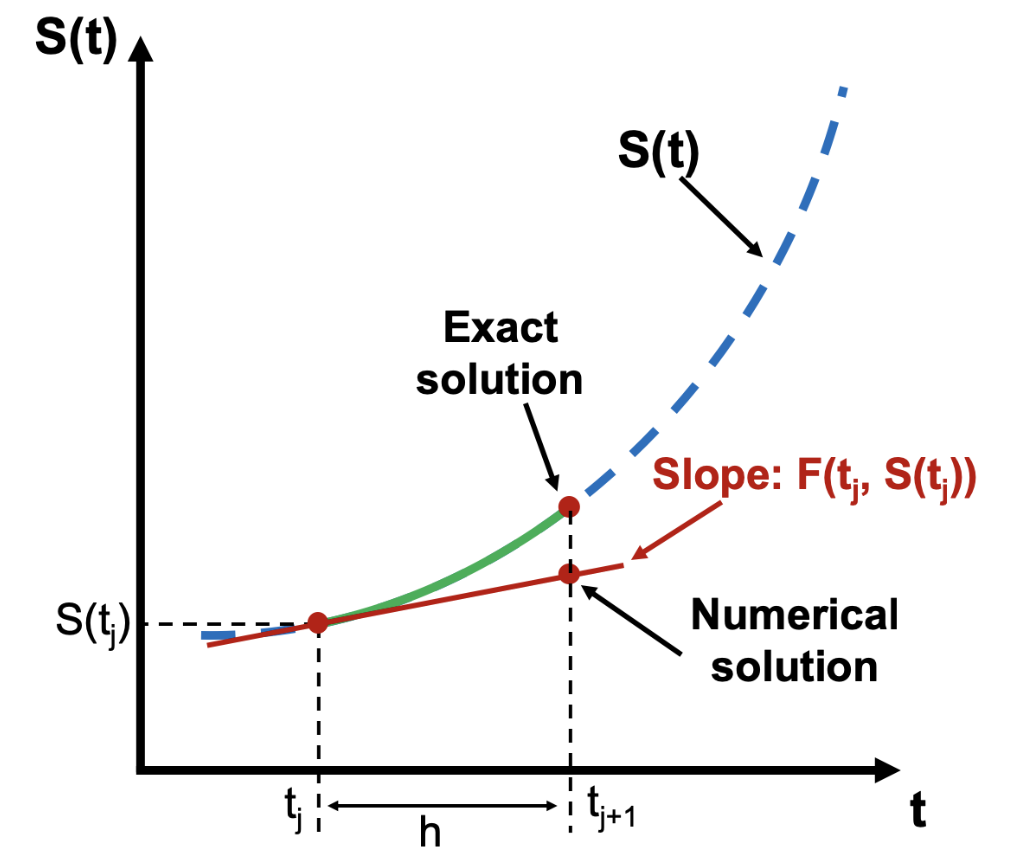





Given the system

\begin{equation*}
x'(t) = x^2(t), ~ t \in (0,0.9], ~x(0)= 1
\end{equation*}

We note that

\begin{equation*}
x(t) = - \frac{1}{t -1}
\end{equation*}

Is the exact solution, because differentiating one gets

\begin{equation*}
x'(t) = \frac{1}{(t-1)^2}
\end{equation*}

which is of course equal to $x^2(t)$

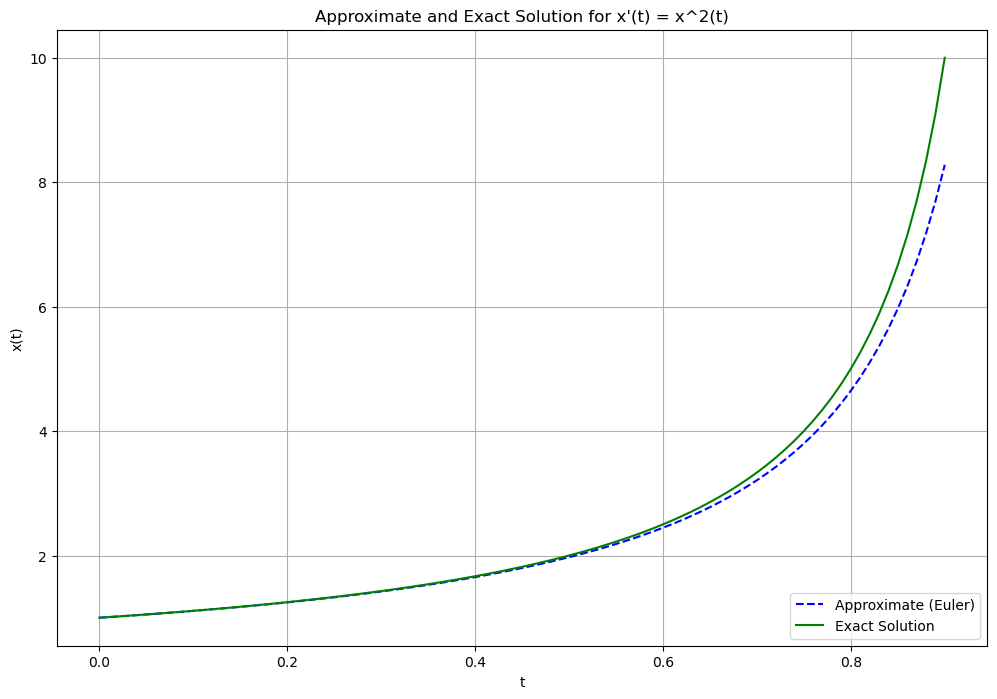

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def explicit_euler(f, t0, t_end, x0, h):
    """
    Implements the explicit Euler method to solve ODEs.
    
    Parameters:
        f: function
            The derivative function f(t, x).
        t0: float
            The initial time.
        t_end: float
            The end time.
        x0: float
            The initial condition x(t0).
        h: float
            The step size.
    
    Returns:
        t: numpy array
            Array of time points.
        x: numpy array
            Array of solution values at each time point.
    """
    t = np.arange(t0, t_end + h, h)
    x = np.zeros(len(t))
    x[0] = x0
    
    for i in range(len(t) - 1):
        x[i + 1] = x[i] + h * f(t[i], x[i])
    
    return t, x

# Define the derivative function
def f(t, x):
    return x**2

# Parameters
t0 = 0
t_end = 0.9
x0 = 1
h = 0.01

# Solve using explicit Euler method
t, x_expl = explicit_euler(f, t0, t_end, x0, h)

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(t, x_expl, 'b--', label='Approximate (Euler)')
plt.plot(t, -1 / (t - 1), 'g', label='Exact Solution')
plt.title("Approximate and Exact Solution for x'(t) = x^2(t)")
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

### Part 2

We now consider Newtons method and implement the Backward Euler method.

For a given ODE:

\begin{equation*}
\vec{x}'(t) = \vec{f}(\vec{x}(t))
\end{equation*}

The Backward Euler method is given by

\begin{equation*}
\vec{x}_{n+1} = \vec{x}_n + h \vec{f}(\vec{x}_{n+1})
\end{equation*}

We must solve for $\vec{x}_{n+1}$ at each step. This is done using Newtons method. We define the function

\begin{equation*}
\vec{F}(t,\vec{x}_{n+1}) = \vec{x}_{n+1} - \vec{x}_n - h \vec{f}(t_{n+1},\vec{x}_{n+1})
\end{equation*}


Newtons Method can be used to solve the equation and gives

\begin{equation*}
\vec{x}^{k+1} = \vec{x}^k - [D \vec{F}(\vec{x}^k)]^{-1} \vec{F}(\vec{x}^k)
\end{equation*}

Considering our $\vec{F}$ this gives

\begin{equation*}
D\vec{F}(\vec{x}) = I - hD\vec{f}(\vec{x})
\end{equation*}



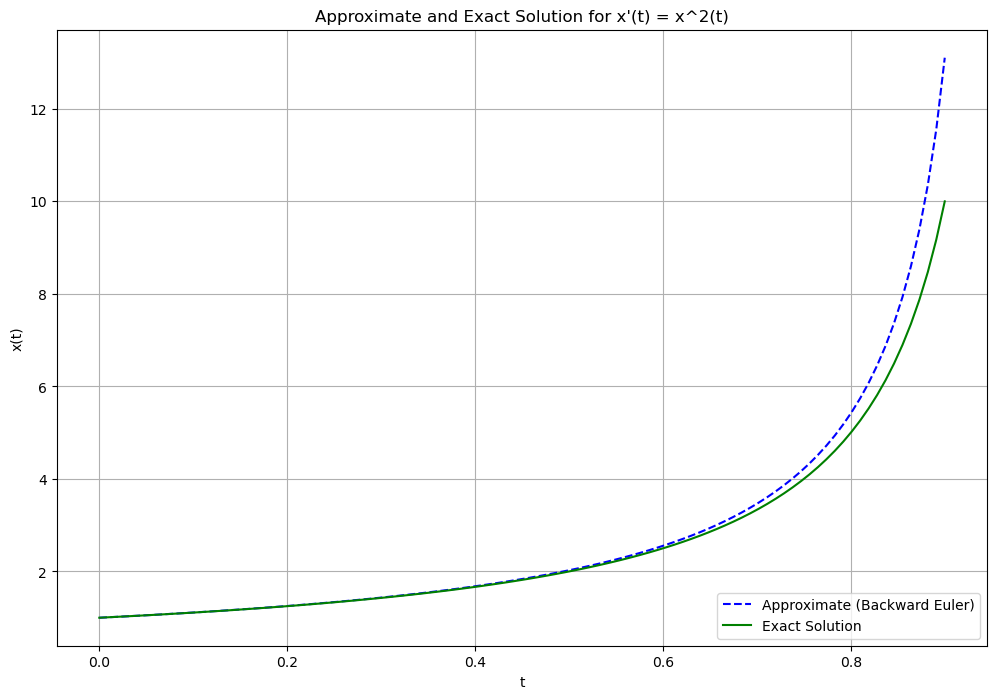

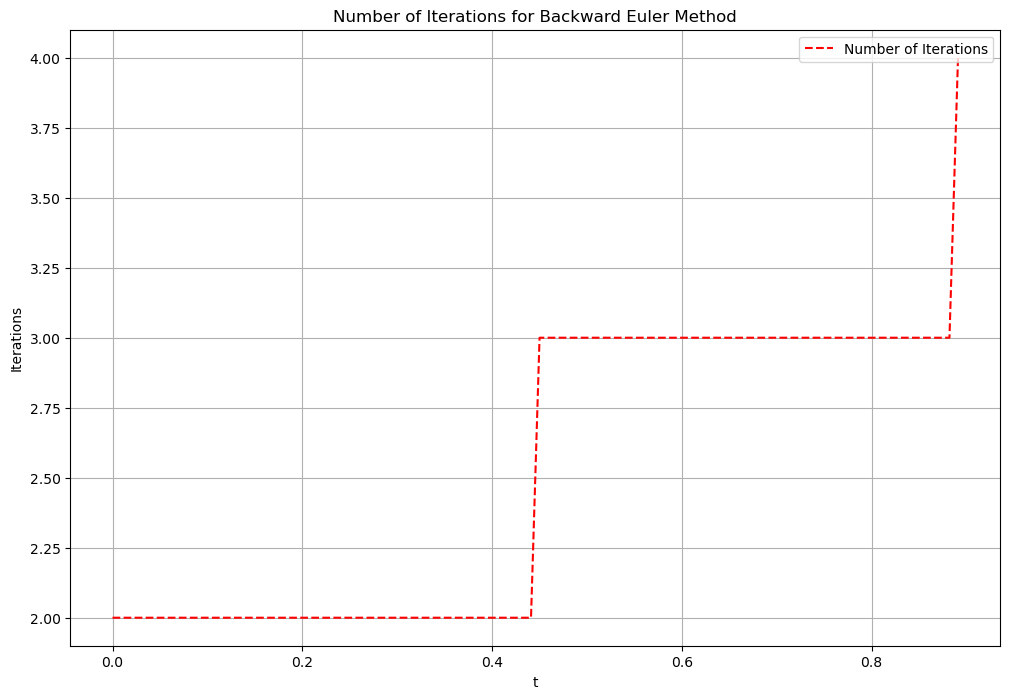

Number of iterations for each time step:
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 4.]
Total number of iterations:
251.0


In [4]:
def f(t,x):
    """
    ODE
    """
    return x**2

def df(t,x):
    """ 
    jacobian of the system
    """
    return 2*x

def backward_euler_newton(t0,tf,x0,n):
    """ 
    Solve x'=f(t,x) using the backward Euler method
    """

    h = (tf-t0)/n
    t = np.linspace(t0,tf,n+1)
    x = np.zeros(n+1)
    iterations = np.zeros(n)
    x[0] = x0

    for i in range(n):
        # Current Values
        tn, xn = t[i], x[i]

        # Forward Eueler
        x_guess = xn + h*f(tn,xn)

        # Newton Parameters
        tol = 1e-8
        max_iter = 100
        iter_count = 0
        error = float("inf")

        # Newton Iteration

        while error > tol and iter_count < max_iter:
            F = x_guess - xn - h*f(tn + h, x_guess)
            DF = 1- h*df(tn + h, x_guess)
            x_new = x_guess - F/DF
            error = abs(x_new - x_guess)
            x_guess = x_new
            iter_count += 1
        x[i+1] = x_guess
        iterations[i] = iter_count

    return t, x, iterations

# Parameters
t0,tf,x0,n = 0,0.9,1,100

# Solve using backward Euler method
t, x, iterations = backward_euler_newton(t0, tf, x0, n)


# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(t, x, 'b--', label='Approximate (Backward Euler)')
plt.plot(t, -1 / (t - 1), 'g', label='Exact Solution')

# Maybe Fix this sometimes
#plt.plot(t, x_expl, 'r--', label='Approximate (Explicit Euler)')
plt.title("Approximate and Exact Solution for x'(t) = x^2(t)")
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()
# Plot the number of iterations
plt.figure(figsize=(12, 8))
plt.plot(t[:-1], iterations, 'r--', label='Number of Iterations')
plt.title("Number of Iterations for Backward Euler Method")
plt.xlabel('t')
plt.ylabel('Iterations')
plt.grid()
plt.legend(loc='upper right')
plt.show()


print("Number of iterations for each time step:")
print(iterations)
print("Total number of iterations:")
print(np.sum(iterations))

# Exercise 4

Goal is now to implement the Newton method and for question 3 and 5, we also compare the number of iterations needed for convergence.

In question 3 we looked at the system

\begin{align*}
f_1(x,y) &= x - ay -\alpha \\
f_2(x,y) &= a \sin(x) + y - \beta
\end{align*}

In question 5 we looked at the system

\begin{align*}
x-ay = \alpha \\
f(x) = 0
\end{align*}

where we defined $f(x) = a^2 \sin(x) + x - (\alpha + a \beta)$

The total goal is to consider the $2^{nd}$ order differential equation describing a pendulum motion

\begin{equation*}
x''(t) + sin(x(t)) = 0 ~ t> 0 ~  x(0) = \epsilon ~ x'(0) = 0
\end{equation*}


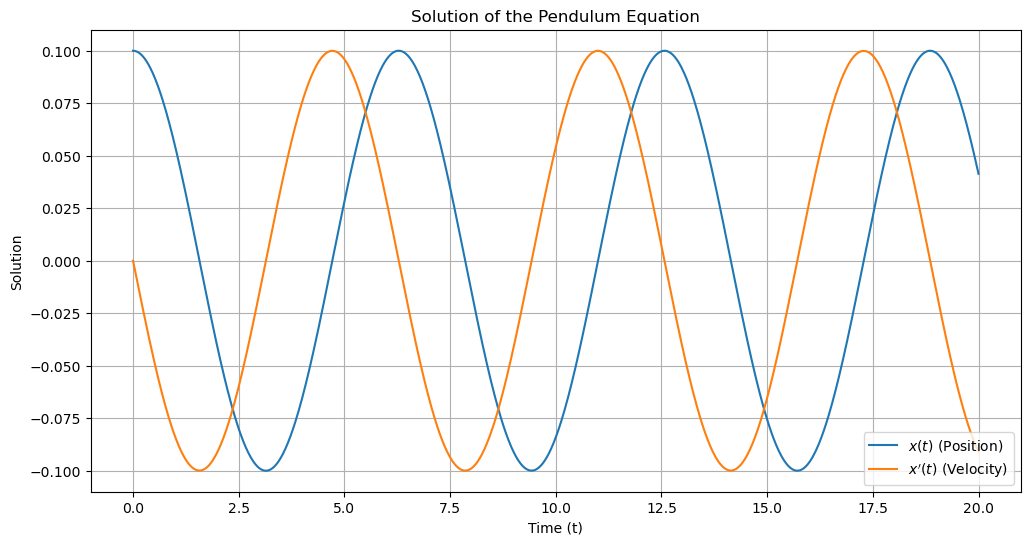

In [34]:
from scipy.integrate import solve_ivp

# We can use scipy libary that numerically integrates the ODE of kind dy/dt = f(t,y)

# We use RK45 which is the Explicit Runge-Kutta method of order 5(4)

import numpy as np

import matplotlib.pyplot as plt

# Define the system
def pendulum_system(t, y):
    x1, x2 = y
    dx1_dt = x2
    dx2_dt = -np.sin(x1)
    return [dx1_dt, dx2_dt]

# Initial conditions
epsilon = 0.1  # x(0) = epsilon
x1_0 = epsilon
x2_0 = 0.0     # x'(0) = 0

# Time span for the solution
t_span = (0, 20) 
t_eval = np.linspace(t_span[0], t_span[1], 1000)  

# Solve the system
sol = solve_ivp(pendulum_system, t_span, [x1_0, x2_0], t_eval=t_eval, method='RK45')

# Extract the solution
t = sol.t
x1 = sol.y[0]  # x1(t) = x(t)
x2 = sol.y[1]  # x2(t) = x'(t)

# Plot the solution
plt.figure(figsize=(12, 6))
plt.plot(t, x1, label=r"$x(t)$ (Position)")
plt.plot(t, x2, label=r"$x'(t)$ (Velocity)")
plt.title("Solution of the Pendulum Equation")
plt.xlabel("Time (t)")
plt.ylabel("Solution")
plt.legend()
plt.grid()
plt.show()


Here we can see that we have these pendulum shape solutions for the ODE

In [35]:
def newtons_method_3(a,alpha,beta,x0,y0, tol=1e-10, max_iter=100):
    """ 
    Applys the Newtons method for the system

    x - a*y = alpha
    a* sin(x) + y = beta
    """ 

    X = np.array([x0,y0])

    iterations = 0

    for _ in range(max_iter):
        x,y = X
        # computw F(x,y)

        F = np.array(
            [x - a*y - alpha,
             a*np.sin(x) + y - beta]
        )

        # Compute the Jacobian of the System

        J = np.array([
            [1, -a],
            [a*np.cos(x), 1]]
        )

        # Solve JdX = -F
        dX = np.linalg.solve(J, -F)
        # Update Step
        X = X + dX
        iterations += 1

        # Check convergence
        if np.linalg.norm(dX) < tol:
            break

    return X, iterations

# Note that a = delta t, alpha = xn, beta = yn

a= 0.5
alpha, beta = 1.0,0.5
x0, y0 = 1.0, 0.7

X, iterations = newtons_method_3(a, alpha, beta, x0, y0)
print("Solution:", X)
print("Number of iterations:", iterations)


Solution: [1.03503052 0.07006103]
Number of iterations: 4


For the implementation of question 5 the update rule is given by

\begin{equation*}
x_{n+1} = x_n - \frac{a^2 \sin(x_n) + x_n - (\alpha + a \beta)}{a^2 \cos(x_n) + 1}
\end{equation*}

In [36]:
def newtons_method_5(a, alpha, beta, x0, tol=1e-10, max_iter=100):
    """ 
    Applys the newton method for solving 

    f(x) = a^2 sin(x)  + x - (alpha + a*beta) = 0

    Then obtaines y by solving y = (x-alpha)/a
    """

    x = x0
    iterations = 0

    for _ in range(max_iter):
        # Compute f(x)
        f = a**2 * np.sin(x) + x - (alpha + a*beta)
        # Compute f'(x)
        f_prime = a**2 * np.cos(x) + 1

        # Perform the update
        dx = -f / f_prime
        x += dx
        iterations += 1

        # Check convergence 
        if abs(dx) < tol:
            break
    # Compute y
    y = (x - alpha) / a
    return np.array([x, y]), iterations


a = 0.5
alpha, beta = 1.0,0.5
x0, y0 = 1.0, 0.7

X, iterations = newtons_method_5(a, alpha, beta, x0)
print("Solution:", X)
print("Number of iterations:", iterations)

Solution: [1.03503052 0.07006103]
Number of iterations: 4


Lets now compare both the methods using a broader variety of initial conditions.

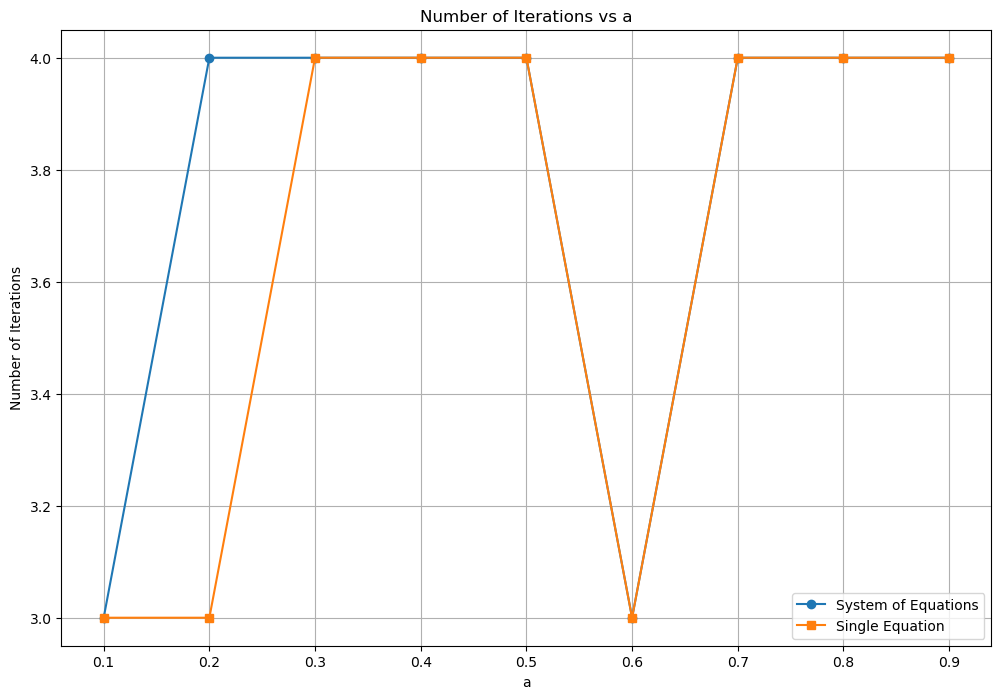

In [37]:
import matplotlib.pyplot as plt

# Test parameters
a_values = np.linspace(0.1, 0.9, 9) # a < 1
alpha,beta = 1.0, 0.5
x0, y0 = 1.0, 0.7

system_iters = []
single_iters = []

for a in a_values:
    # Evaluate the question 3 part
    _, iters_sys = newtons_method_3(a, alpha, beta, x0, y0)
    system_iters.append(iters_sys)

    # Evaluate the question 5 part
    _, iters_single = newtons_method_5(a, alpha, beta, x0)
    single_iters.append(iters_single)
# Plotting the results
plt.figure(figsize=(12, 8))
plt.plot(a_values, system_iters, 'o-', label='System of Equations')
plt.plot(a_values, single_iters, 's-', label='Single Equation')
plt.title('Number of Iterations vs a')
plt.xlabel('a')
plt.ylabel('Number of Iterations')
plt.legend()
plt.grid()
plt.show()


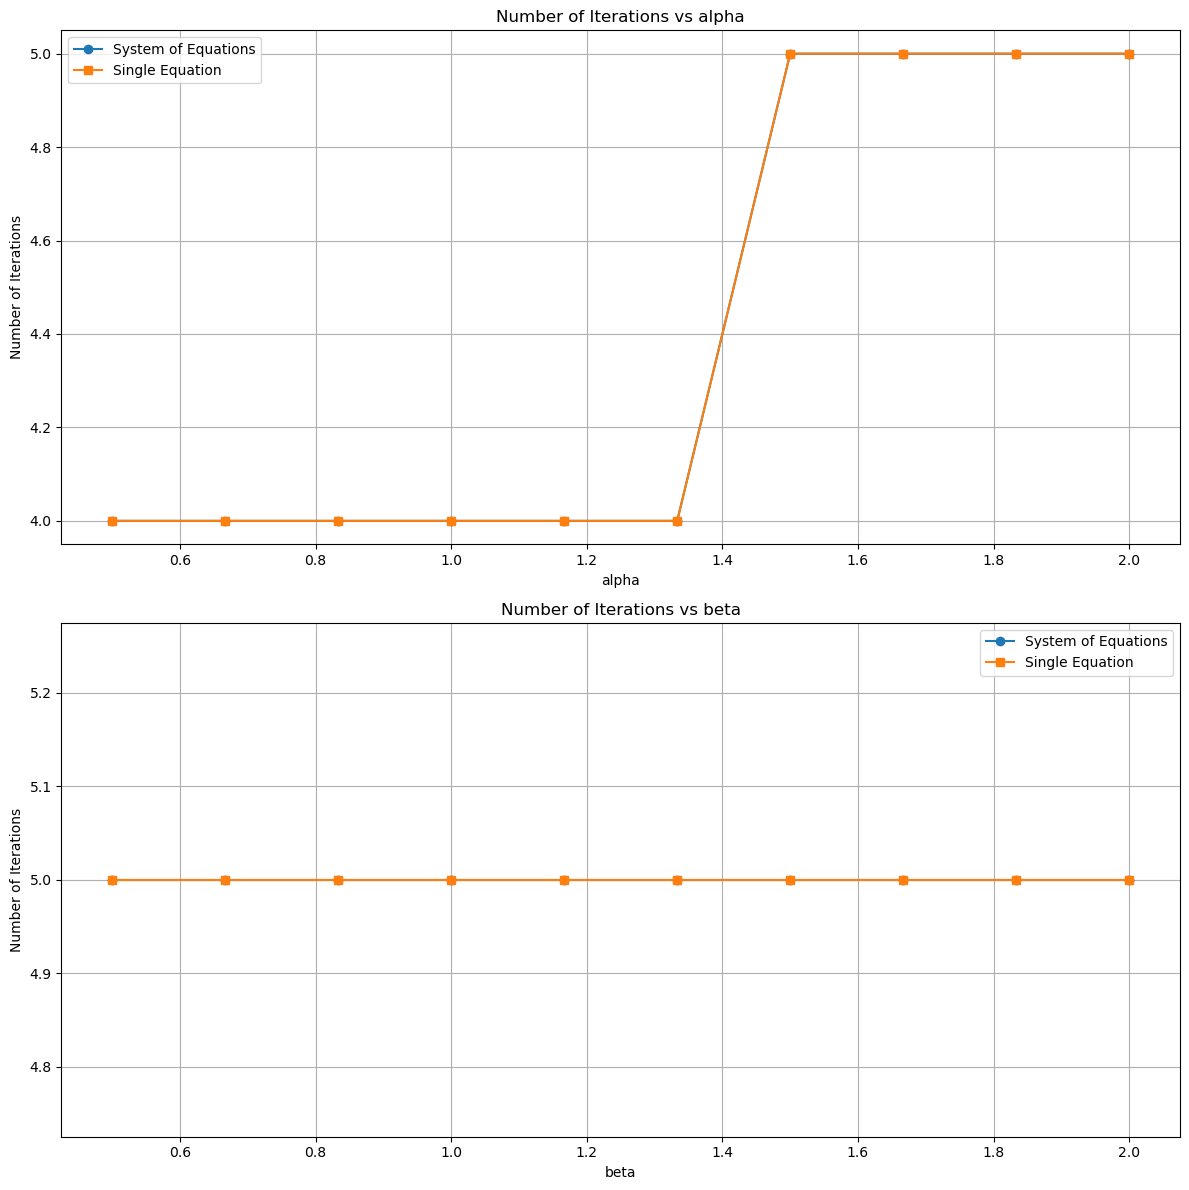

In [38]:
# Now vary alpha and beta
a = 0.5
alpha_values = np.linspace(0.5, 2, 10)
beta_values = np.linspace(0.5, 2, 10)
system_iters_alpha = []
system_iters_beta = []
single_iters_alpha = []
single_iters_beta = []
for alpha in alpha_values:
    _, iters_sys = newtons_method_3(a, alpha, beta, x0, y0)
    system_iters_alpha.append(iters_sys)
    _, iters_single = newtons_method_5(a, alpha, beta, x0)
    single_iters_alpha.append(iters_single)
for beta in beta_values:
    _, iters_sys = newtons_method_3(a, alpha, beta, x0, y0)
    system_iters_beta.append(iters_sys)
    _, iters_single = newtons_method_5(a, alpha, beta, x0)
    single_iters_beta.append(iters_single)
# Make two subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 12))
axs[0].plot(alpha_values, system_iters_alpha, 'o-', label='System of Equations')
axs[0].plot(alpha_values, single_iters_alpha, 's-', label='Single Equation')
axs[0].set_title('Number of Iterations vs alpha')
axs[0].set_xlabel('alpha')
axs[0].set_ylabel('Number of Iterations')
axs[0].legend()
axs[0].grid()
axs[1].plot(beta_values, system_iters_beta, 'o-', label='System of Equations')
axs[1].plot(beta_values, single_iters_beta, 's-', label='Single Equation')
axs[1].set_title('Number of Iterations vs beta')
axs[1].set_xlabel('beta')
axs[1].set_ylabel('Number of Iterations')
axs[1].legend()
axs[1].grid()
plt.tight_layout()
plt.show()

### Point 7

We now consider the system

\begin{align*}
x''(t) + \mu x'(t) + \sin(x(t)) = 0 \\
x(0) = \epsilon \\ x'(0) = 0
\end{align*}

here $\mu \in \mathbb{R}$ is a damping factor. We can see that the system is damped for $\mu > 0$ and undamped for $\mu = 0$. 

We derivate the Equation

\begin{align*}
F(X) &= \begin{pmatrix}
x-a\mu - x_n \\
a\sin(x) + (1 + a\mu)y - y_n
\end{pmatrix} \\
\end{align*}

Where $X = \begin{pmatrix}

We can now use our Newtons method to solve the system. 

\begin{equation}
X^{k+1} = X^k - J^{-1}F(X^k)
\end{equation}

Where $J$ is the Jacobian of $F$

\begin{equation}
J = \begin{pmatrix}
1 & -a \\
-a\cos(x) & 1 + a\mu
\end{pmatrix}
\end{equation}





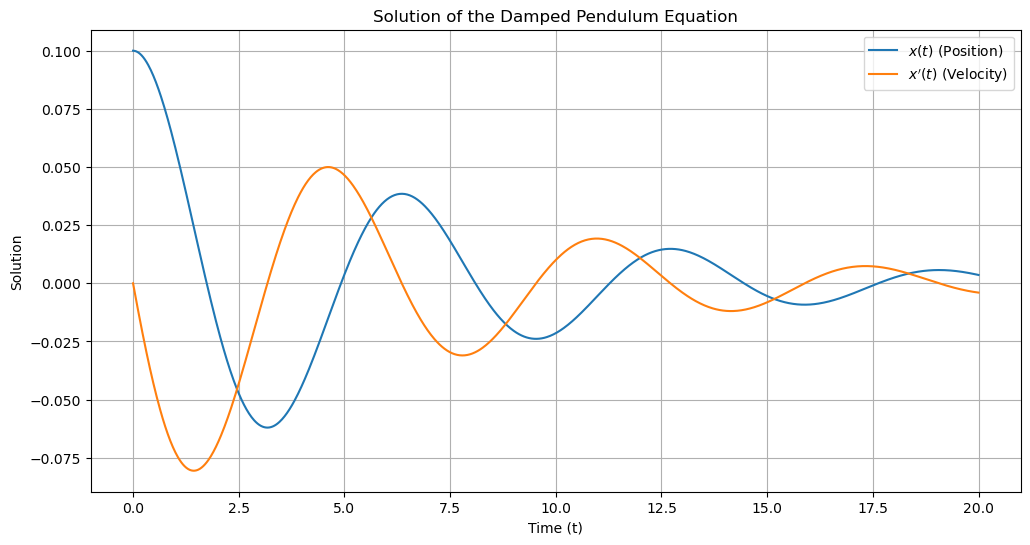

In [42]:
from scipy.integrate import solve_ivp
import numpy as np

import matplotlib.pyplot as plt

# Define the system of equations
def damped_pendulum_system(t, y, mu):
    x1, x2 = y
    dx1_dt = x2
    dx2_dt = -mu * x2 - np.sin(x1)
    return [dx1_dt, dx2_dt]

# Parameters
mu = 0.3
epsilon = 0.1  
x1_0 = epsilon
x2_0 = 0.0  


t_span = (0, 20)  
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Solve the system
sol = solve_ivp(damped_pendulum_system, t_span, [x1_0, x2_0], t_eval=t_eval, args=(mu,))

# Extract the solution
t = sol.t
x1 = sol.y[0]  # x1(t) = x(t)
x2 = sol.y[1]  # x2(t) = x'(t)

# Plot the solution
plt.figure(figsize=(12, 6))
plt.plot(t, x1, label=r"$x(t)$ (Position)")
plt.plot(t, x2, label=r"$x'(t)$ (Velocity)")
plt.title("Solution of the Damped Pendulum Equation")
plt.xlabel("Time (t)")
plt.ylabel("Solution")
plt.legend()
plt.grid()
plt.show()

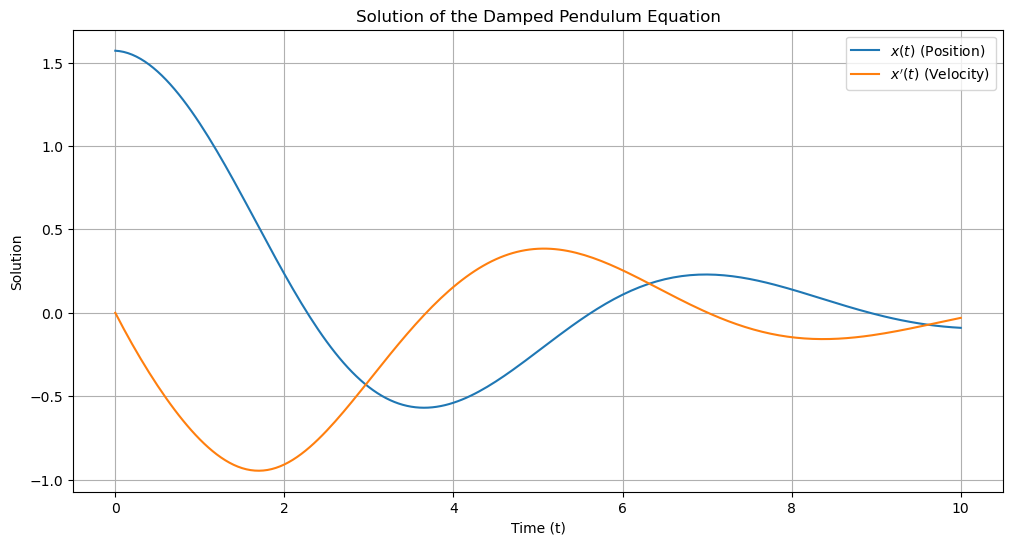

In [43]:
def damped_pendulum_newton(xi, mu, t_final, dt, tol=1e-8, max_iter=100):
    """ 
    Solves the damped pendulum system using the Implict Euler + Newton Method

    Args:
        xi = initial angle x(0) = epsilon
        mu = damping factor
        t_final = final time of simulation
        dt = time step
        tol = tolerance for newtons method
        max_iter = MAximum newton iterations per step

        returns:
        t: time grid
        x = solution x(t)
        y = solution y(t) = x'(t) 
    """

    # Make time grid
    t = np.arange(0, t_final + dt, dt)
    N = len(t)

    # Initialize Soltions array
    x = np.zeros(N)
    y = np.zeros(N)
    x[0] = xi
    y[0] = 0 # Intial condition

    for n in range(N-1): # For each N in our Steps
        # Current state
        x_n = x[n]
        y_n = y[n]

        # Initialize Guess for Newtons method
        X = np.array([x_n, y_n])

        # Newton iteration
        for _ in range(max_iter):
            # Compute F(X):
            F = np.array([
                X[0] - x_n - dt*X[1],
                dt * np.sin(X[0]) + (1 + dt*mu) * X[1] - y_n]
                )
            
            # Compute Jacobian J(X)
            J = np.array([
                [1, -dt],
                [dt * np.cos(X[0]), 1 + dt*mu]
            ])

            # Solve JdX = -F
            dX = np.linalg.solve(J, -F)
            # Update Step
            X += dX

            # Check Convergenced
            if np.linalg.norm(dX) < tol:
                break
        # Store current solution
        x[n+1] = X[0]
        y[n+1] = X[1]
    return t, x, y

xi = np.pi/2 # 90 degrees
mu = 0.5 # Damping
t_final  = 10 # sim time
dt = 0.05 # Time step
t, x, y = damped_pendulum_newton(xi, mu, t_final, dt)
# Plot the solution
plt.figure(figsize=(12, 6))
plt.plot(t, x, label=r"$x(t)$ (Position)")
plt.plot(t, y, label=r"$x'(t)$ (Velocity)")
plt.title("Solution of the Damped Pendulum Equation")
plt.xlabel("Time (t)")
plt.ylabel("Solution")
plt.legend()
plt.grid()
plt.show()
